In [87]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use({'figure.facecolor':'white'})

In [121]:
temp = np.linspace(-10, 25, num=100)
time = np.linspace(0, 24, num=100)

def kernel_term(h, mu, sig2):
    K = 1/(np.sqrt(sig2*2*np.pi))*np.exp(-(h-mu)*(h-mu)/(2*sig2))
    return K

#activity related term
agg_cons = {}
for t in time:
    agg_cons[t] = 2+0.8*kernel_term(t, 7, 0.75) + 3*kernel_term(t, 20, 1)

#temp driven term
heat_cons = {}
for t in temp:
    heat_cons[t] = 3*(1 - 1/(1 + np.exp(0.5*(3 - t))))

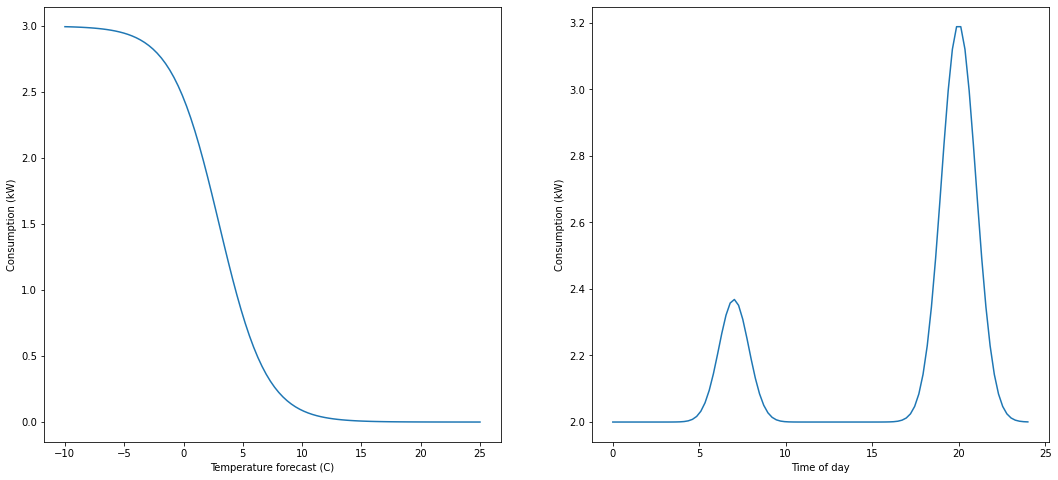

In [89]:
fig0, ax0 = plt.subplots(nrows=1, ncols=2, squeeze=False, figsize=(18,8))
ax0[0,0].plot(list(heat_cons.keys()), list(heat_cons.values()))
ax0[0,0].set_xlabel('Temperature forecast (C)');ax0[0,0].set_ylabel('Consumption (kW)')
ax0[0,1].plot(list(agg_cons.keys()), list(agg_cons.values()))
ax0[0,1].set_xlabel('Time of day');ax0[0,1].set_ylabel('Consumption (kW)');

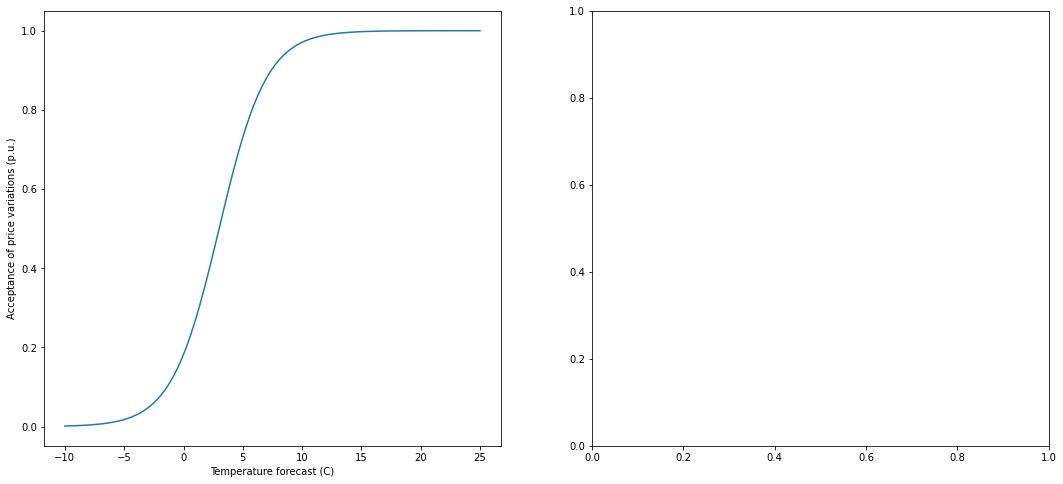

In [126]:
# ------------------------------------------- EXAMPLE 9.9 ------------------------------------------- #

# Prediction of the Electric Consumption for a Group of Households, Made Flexible Through Real-Time Pricing

def consumpion_prediction(time, temp):
    u_i = 3*(1 - 1/(1 + np.exp(0.5*(3 - temp)))) + 2+0.8*kernel_term(time, 7, 0.75) + 3*kernel_term(time, 20, 1)
    return u_i

def willingnes_to_accept(tau, temp):
    will = tau/(1 + np.exp(0.5*(3-temp)))
    return will

acceptance = {}
for t in temp:
    acceptance[t] = willingnes_to_accept(1, t)

fig0, ax0 = plt.subplots(nrows=1, ncols=2, squeeze=False, figsize=(18,8))
ax0[0,0].plot(list(acceptance.keys()), list(acceptance.values()))
ax0[0,0].set_xlabel('Temperature forecast (C)');ax0[0,0].set_ylabel('Acceptance of price variations (p.u.)');